In [1]:
import numpy as np
import matplotlib.pyplot as plt

# check for periodic boundary conditions

# Main Loop

    # Mover --> Use leapfrog to update positions

    # check for periodic boundary conditions

    # Accumulate density from Particles to Grid	(mind the BC)
    # and calculate charge density

    # Solve Poisson's equation with the new charge density	
    # (solve first laplacian(phi) = -rho
    # and then E = - grad(phi)
		
    # Once again: are your boundary conditions satisfied?
    # Quick test: is mean(E)=0	satisfied?

    # Calculate Electric field on the position of the particles
    # (interpolate particle --> grid)	
    
    # Update particle velocity with leapfrog
    # vp=vp + QM * Ep * DT
    
    # Put your diagnostics here: calculate energy and momentum 

    # Make plots, movies, etc.

In [2]:
def leapfrog_position(x_0, v_half):
    '''
    calculate new positions
    input: 2x np.array, both shape N
    output: 1x np.array checked with boundary condition, shape N
    '''
    x_1 = x_0 + v_half * DT
    x_1 = np.remainder(x_1, L) #cuts off all 2 * pi
    return x_1

def w_function(positions):
    '''
    for each particle assign a charge to a gridpoint, weighted by distance to it
    input: 1x np.array, shape N
    output: 1x np.array, shape NG
    '''
    summed_w_func = np.zeros(32)
    pos_resp_to_grid = positions/cellsize
    for element in pos_resp_to_grid:
        lower_nr = int(element)
        higher_nr = (lower_nr + 1)%32 #periodic boundary condition
        decimal = element - lower_nr
        anti_decimal = 1. - decimal
        summed_w_func[lower_nr] = summed_w_func[lower_nr] + anti_decimal
        summed_w_func[higher_nr] = summed_w_func[higher_nr] + decimal
    summed_w_func = summed_w_func/N #scale to nr of particles
    return summed_w_func


def rho_vector(summed_w_func):
    '''
    from charge of electrons at grid points, to complete charge density at grid points
    input: 1x np.array, shape NG
    output: 1x np.array, shape NG
    '''
    rho_func = ((-1 * summed_w_func) + (1)/(NG))/cellsize #+ 1/nr_grids due to plasma neutrality
    return rho_func

def make_solve_matrix_phi():
    '''
    make matrix to solve the 2nd order differential equation
    input: nothing
    output: 1x np.array with shape NG x NG
    '''
    solv_matrix_phi = np.zeros((NG,NG))
    for row_nr in range(len(solv_matrix_phi)):
        for column_nr in range(len(solv_matrix_phi)):
            if row_nr == column_nr:
                solv_matrix_phi[row_nr, column_nr] = -2.
            elif (row_nr + 1)%32 == column_nr:
                solv_matrix_phi[row_nr, column_nr] = 1
            elif row_nr == (column_nr + 1)%32:
                solv_matrix_phi[row_nr, column_nr] = 1
    return solv_matrix_phi


def solve_for_phi(rho_func, solv_matrix_phi):
    '''
    solve 2nd order differential equation from rho to phi
    input: 1x np.array, shape NG | 1x np.array, shape NG,NG
    output: 1x np.array, shape NG
    '''
    new_rho_func = rho_func * -1 * (cellsize**2)
    phi_func = np.linalg.solve(solv_matrix_phi, new_rho_func)
    return phi_func



def solve_for_E_2(phi_func):
    '''
    solve grad phi is electric field
    input: 1x np.array, shape NG
    output: 1x np.array, shape NG
    '''
    new_phi_func = (phi_func * -1)/(2 * cellsize)
    E_func = []
    for phi_i in range(len(new_phi_func)):
        phi_prev = new_phi_func[phi_i -1]
        phi_next = new_phi_func[(phi_i +1)%32]
        E = phi_next - phi_prev
        E_func.append(E)
    E_func = np.array(E_func)
    return E_func


def leapfrog_velocity(v_half, x_1, E_func):
    '''
    update velocities of all particles
    input: 2x np.array, shape N | 1x np.array, shape NG
    output: 2x np.array, shape N
    '''
    E_at_x_1 = E_p(x_1, E_func)
    v_anderhalf = v_half + DT * QM * E_at_x_1
    return v_anderhalf, E_at_x_1

def E_p(x_array, E_func):
    '''
    calculate electric field at position x, using a linear relation between the neighbouring grid points
    input: 1x np.array, shape N | 1x np.array, shape NG
    output: 1x np.array, shape N
    '''
    E_at_x_list = []
    for x in x_array:
        low_bound_index = int(x) -1
        high_bound_index = low_bound_index + 1
        low_bound = E_func[low_bound_index]
        high_bound = E_func[high_bound_index]
        slope = (high_bound - low_bound)/cellsize
        decimal = x%1
        E_at_x = low_bound + slope * decimal
        E_at_x_list.append(E_at_x)
    E_at_x_array = np.array(E_at_x_list)
    return E_at_x_array
        


current time =  0
1.0  = sum of W_function. should be 1
-8.82540568403e-17  = sum of charge_density. should be 0, because plasma is neutral
0.0 = mean_E_field. should be 0
20.0888920902 = total kinetic energy, should be constant
0.000249633109807 = total electric energy, should be constant
20.0891417233 = total energy, should be constant


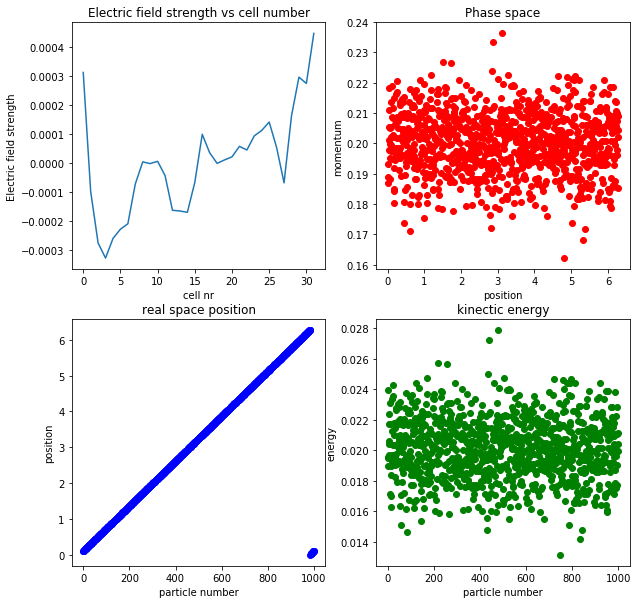

current time =  25
1.0  = sum of W_function. should be 1
-1.34657909823e-16  = sum of charge_density. should be 0, because plasma is neutral
0.0 = mean_E_field. should be 0
18.4528634307 = total kinetic energy, should be constant
0.11202573952 = total electric energy, should be constant
18.5648891703 = total energy, should be constant


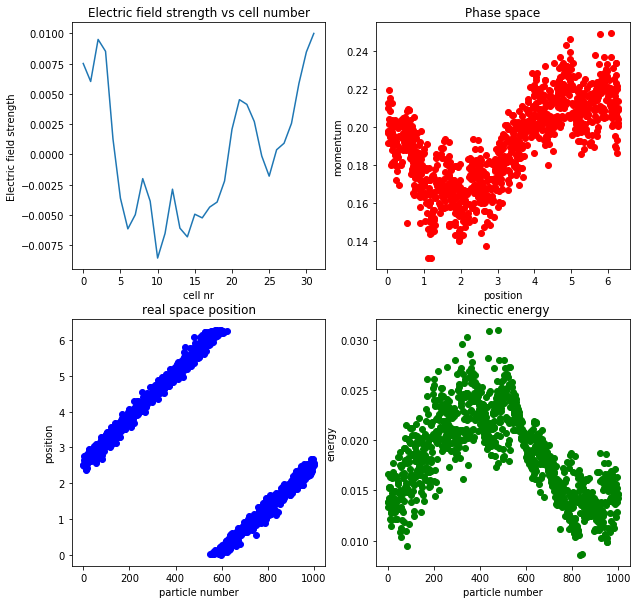

current time =  50
1.0  = sum of W_function. should be 1
2.08166817117e-16  = sum of charge_density. should be 0, because plasma is neutral
8.67361737988e-19 = mean_E_field. should be 0
159.634212334 = total kinetic energy, should be constant
4.23631663119 = total electric energy, should be constant
163.870528965 = total energy, should be constant


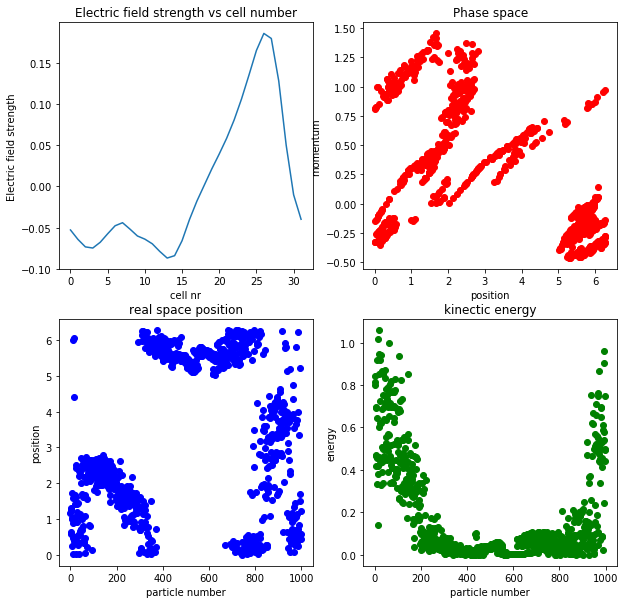

current time =  75
1.0  = sum of W_function. should be 1
1.2490009027e-16  = sum of charge_density. should be 0, because plasma is neutral
-6.93889390391e-18 = mean_E_field. should be 0
877.080684302 = total kinetic energy, should be constant
3.17391783626 = total electric energy, should be constant
880.254602139 = total energy, should be constant


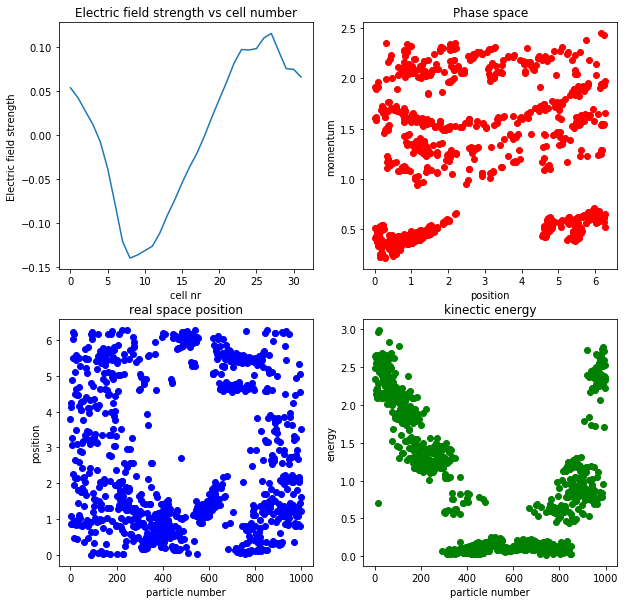

current time =  100
1.0  = sum of W_function. should be 1
1.11022302463e-16  = sum of charge_density. should be 0, because plasma is neutral
-3.90312782095e-18 = mean_E_field. should be 0
336.532766842 = total kinetic energy, should be constant
3.2946152254 = total electric energy, should be constant
339.827382068 = total energy, should be constant


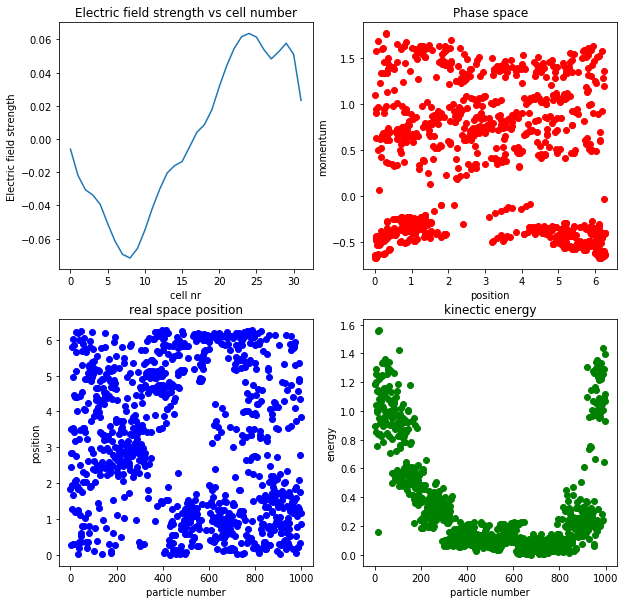

current time =  125
1.0  = sum of W_function. should be 1
3.53883589099e-16  = sum of charge_density. should be 0, because plasma is neutral
-8.67361737988e-19 = mean_E_field. should be 0
547.109311809 = total kinetic energy, should be constant
0.852086197357 = total electric energy, should be constant
547.961398006 = total energy, should be constant


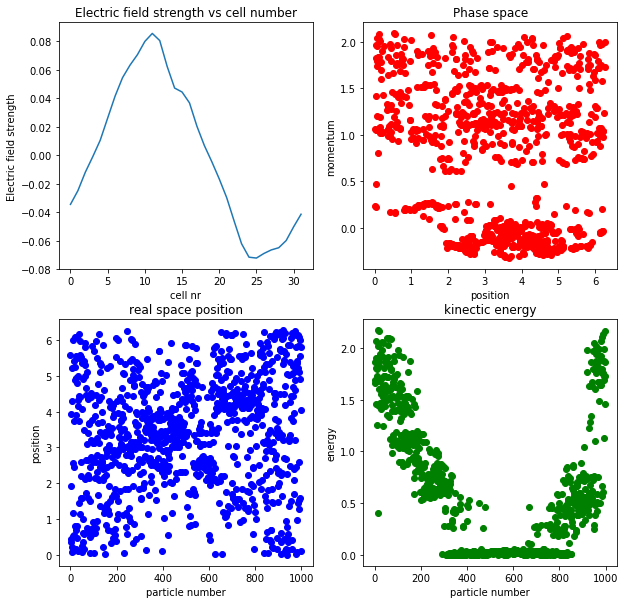

current time =  150
1.0  = sum of W_function. should be 1
-1.38777878078e-17  = sum of charge_density. should be 0, because plasma is neutral
-2.16840434497e-19 = mean_E_field. should be 0
388.178137797 = total kinetic energy, should be constant
0.614344163884 = total electric energy, should be constant
388.792481961 = total energy, should be constant


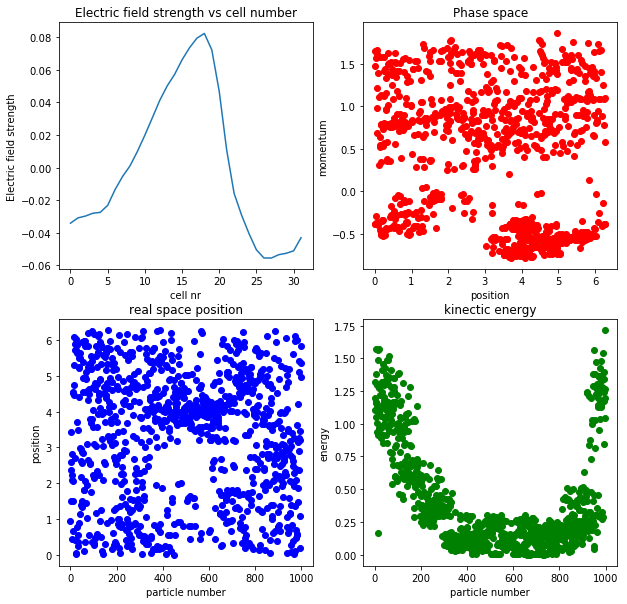

current time =  175
1.0  = sum of W_function. should be 1
2.22044604925e-16  = sum of charge_density. should be 0, because plasma is neutral
-1.30104260698e-18 = mean_E_field. should be 0
372.677482793 = total kinetic energy, should be constant
0.605054694266 = total electric energy, should be constant
373.282537487 = total energy, should be constant


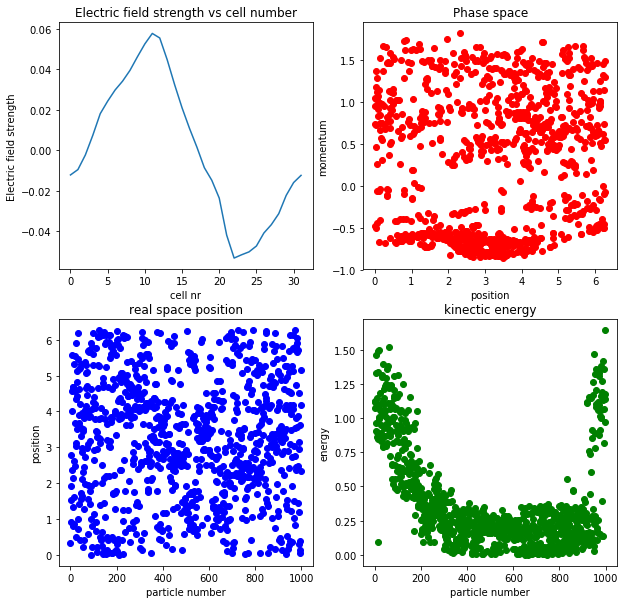

current time =  200
1.0  = sum of W_function. should be 1
1.73472347598e-16  = sum of charge_density. should be 0, because plasma is neutral
4.33680868994e-19 = mean_E_field. should be 0
386.123812611 = total kinetic energy, should be constant
1.95053262937 = total electric energy, should be constant
388.07434524 = total energy, should be constant


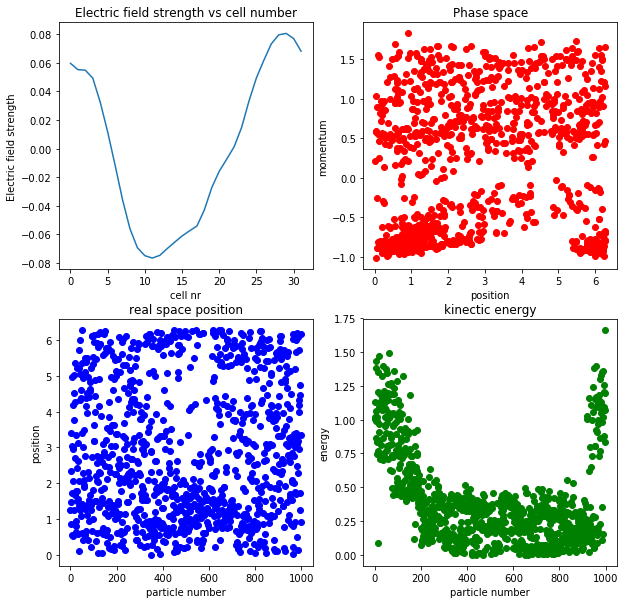

current time =  225
1.0  = sum of W_function. should be 1
7.6327832943e-17  = sum of charge_density. should be 0, because plasma is neutral
2.38524477947e-18 = mean_E_field. should be 0
428.718346546 = total kinetic energy, should be constant
1.39596392861 = total electric energy, should be constant
430.114310475 = total energy, should be constant


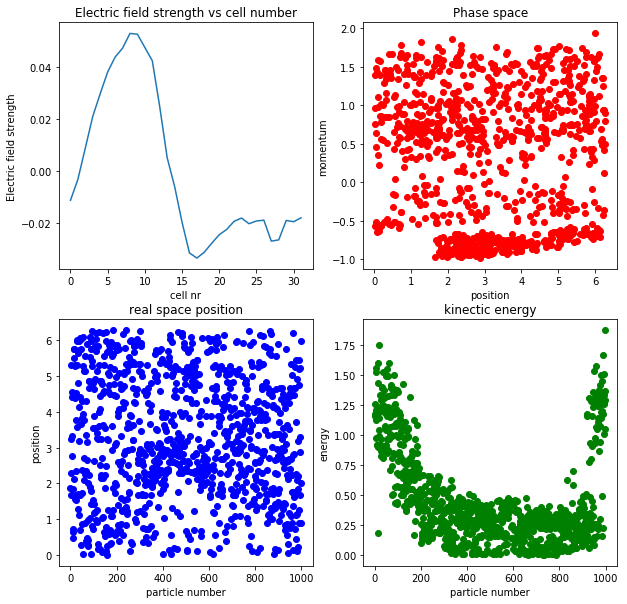

current time =  250
1.0  = sum of W_function. should be 1
4.85722573274e-17  = sum of charge_density. should be 0, because plasma is neutral
1.95156391047e-18 = mean_E_field. should be 0
422.654145176 = total kinetic energy, should be constant
0.397192933942 = total electric energy, should be constant
423.05133811 = total energy, should be constant


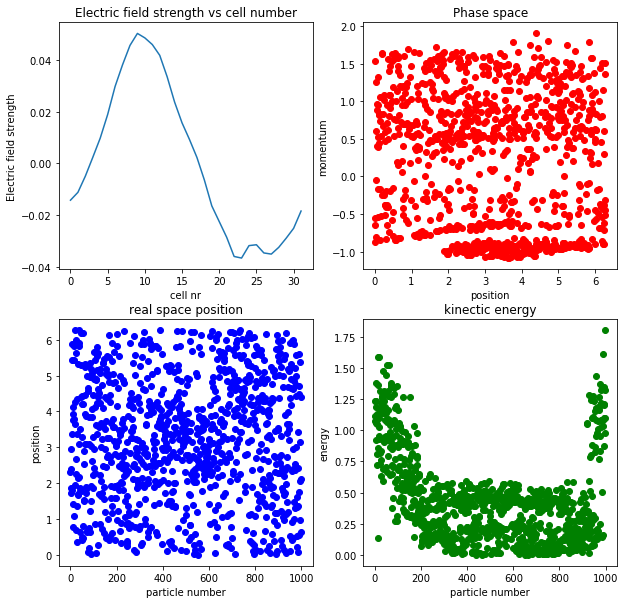

current time =  275
1.0  = sum of W_function. should be 1
-1.21430643318e-16  = sum of charge_density. should be 0, because plasma is neutral
4.33680868994e-19 = mean_E_field. should be 0
440.473489445 = total kinetic energy, should be constant
0.423454408357 = total electric energy, should be constant
440.896943854 = total energy, should be constant


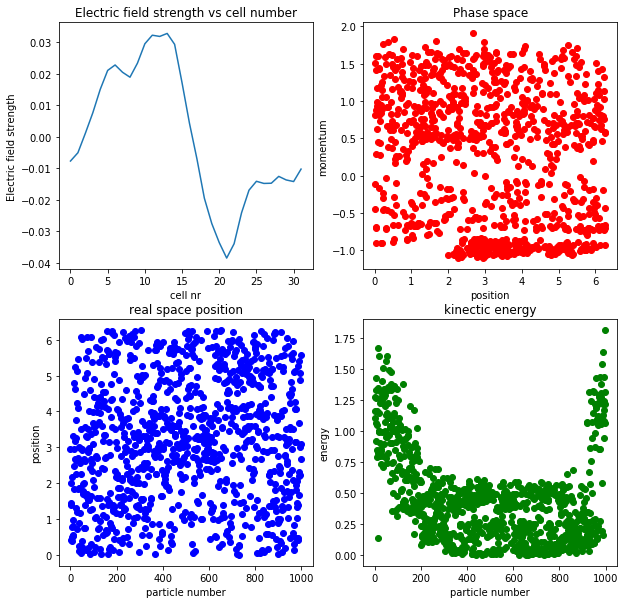

current time =  300
1.0  = sum of W_function. should be 1
1.71737624122e-16  = sum of charge_density. should be 0, because plasma is neutral
-4.33680868994e-19 = mean_E_field. should be 0
445.676816611 = total kinetic energy, should be constant
0.805818643002 = total electric energy, should be constant
446.482635254 = total energy, should be constant


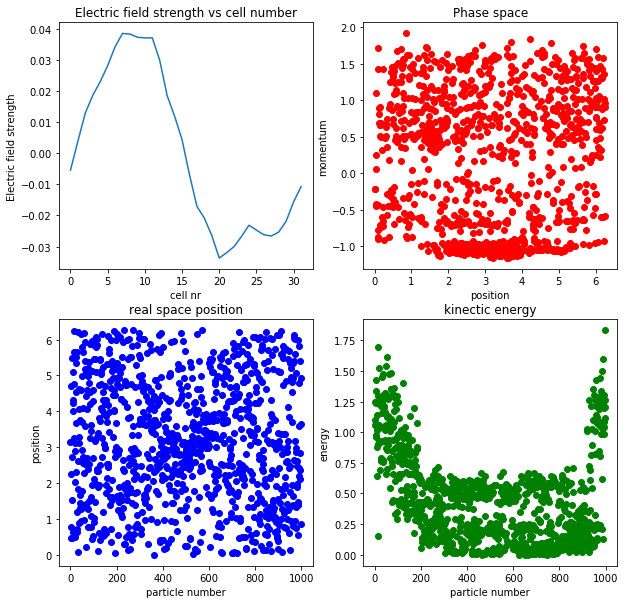

current time =  325
1.0  = sum of W_function. should be 1
-3.46944695195e-17  = sum of charge_density. should be 0, because plasma is neutral
1.30104260698e-18 = mean_E_field. should be 0
447.437379022 = total kinetic energy, should be constant
1.54579763006 = total electric energy, should be constant
448.983176652 = total energy, should be constant


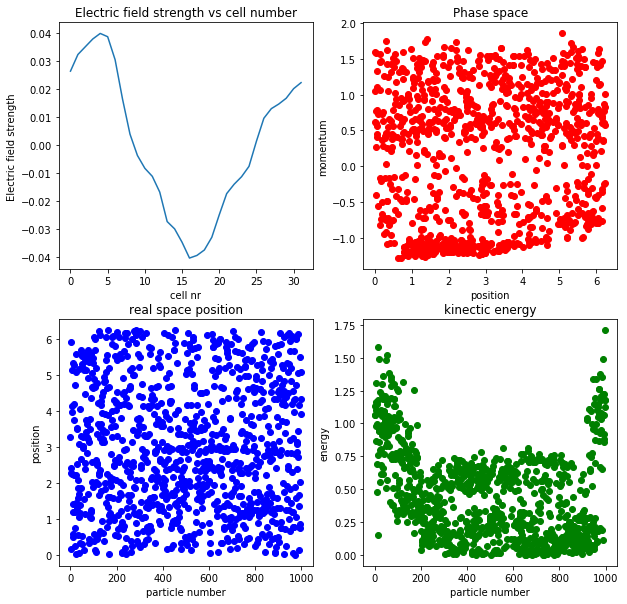

current time =  350
1.0  = sum of W_function. should be 1
5.20417042793e-17  = sum of charge_density. should be 0, because plasma is neutral
1.73472347598e-18 = mean_E_field. should be 0
461.986903541 = total kinetic energy, should be constant
1.16332485157 = total electric energy, should be constant
463.150228392 = total energy, should be constant


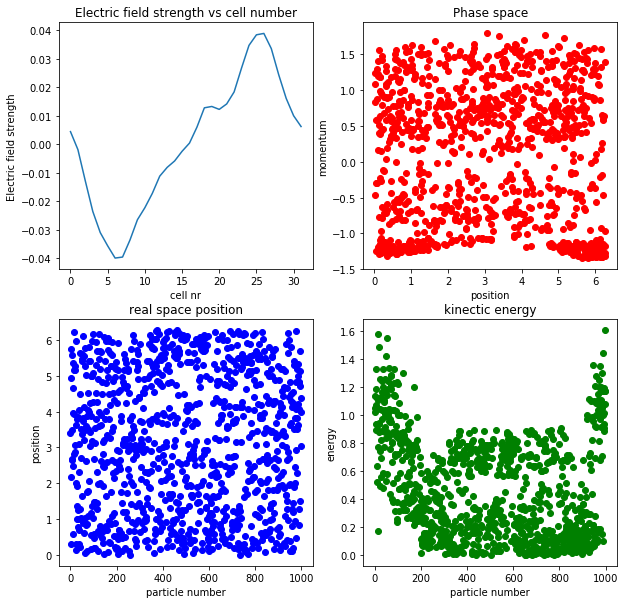

current time =  375
1.0  = sum of W_function. should be 1
1.54390389362e-16  = sum of charge_density. should be 0, because plasma is neutral
-1.95156391047e-18 = mean_E_field. should be 0
477.10137611 = total kinetic energy, should be constant
0.0407407532079 = total electric energy, should be constant
477.142116863 = total energy, should be constant


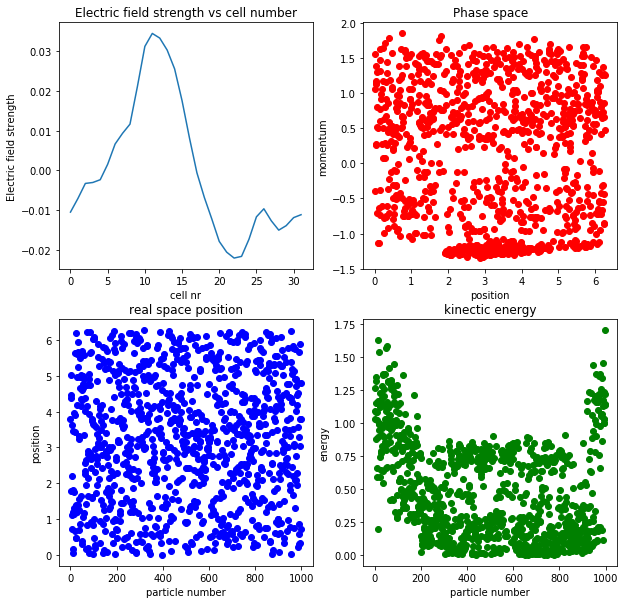

current time =  400
1.0  = sum of W_function. should be 1
-7.97972798949e-17  = sum of charge_density. should be 0, because plasma is neutral
1.08420217249e-18 = mean_E_field. should be 0
482.43420656 = total kinetic energy, should be constant
0.4326878988 = total electric energy, should be constant
482.866894459 = total energy, should be constant


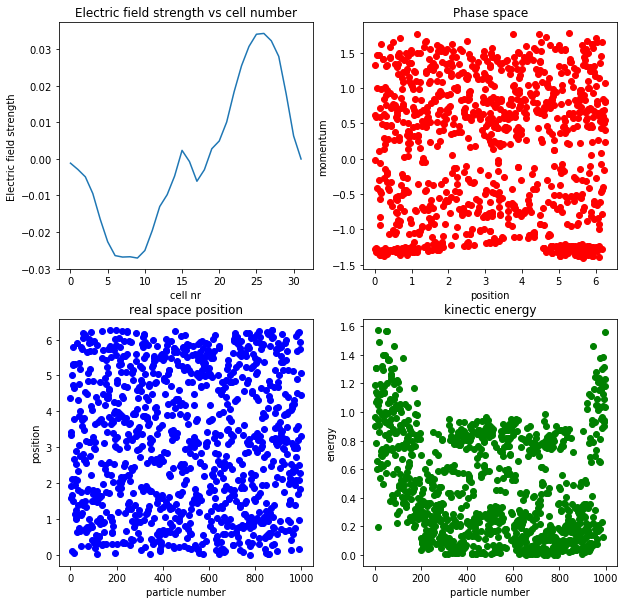

current time =  425
1.0  = sum of W_function. should be 1
-3.05311331772e-16  = sum of charge_density. should be 0, because plasma is neutral
0.0 = mean_E_field. should be 0
491.93935112 = total kinetic energy, should be constant
1.79536126366 = total electric energy, should be constant
493.734712383 = total energy, should be constant


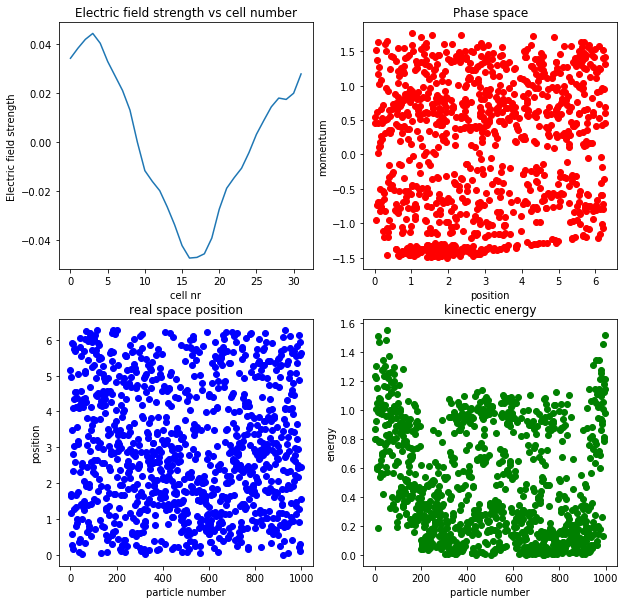

current time =  450
1.0  = sum of W_function. should be 1
-2.23562487967e-16  = sum of charge_density. should be 0, because plasma is neutral
1.95156391047e-18 = mean_E_field. should be 0
501.150944036 = total kinetic energy, should be constant
1.01552219213 = total electric energy, should be constant
502.166466228 = total energy, should be constant


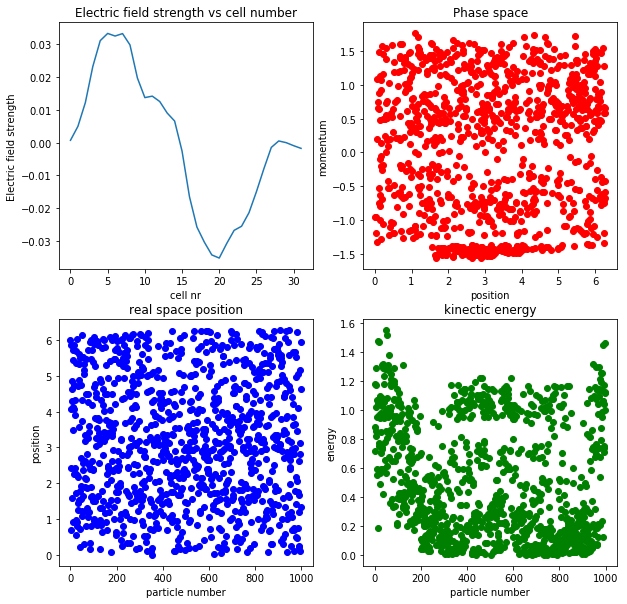

current time =  475
1.0  = sum of W_function. should be 1
1.80790712262e-16  = sum of charge_density. should be 0, because plasma is neutral
8.67361737988e-19 = mean_E_field. should be 0
512.178669646 = total kinetic energy, should be constant
0.0826920863548 = total electric energy, should be constant
512.261361733 = total energy, should be constant


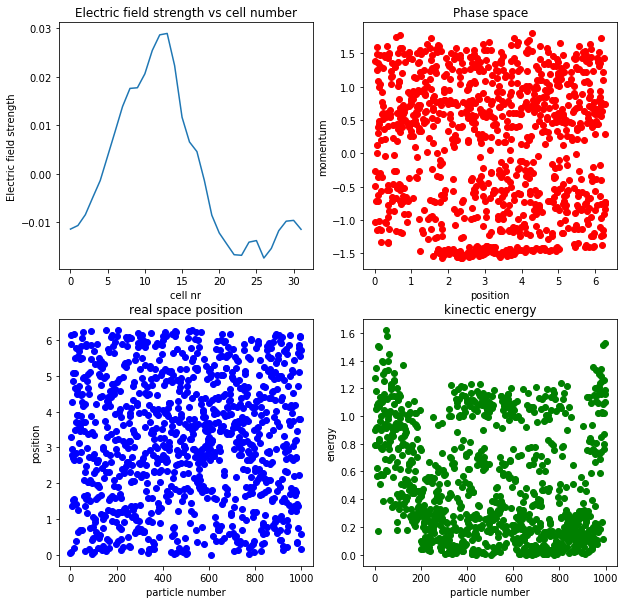

Done


In [3]:
# Define some quantities
L=2.0 * np.pi # box length
DT=0.5 # timestep
NT=500 # total number of timesteps
NTOUT=25 # save output every other NTOUT
NG=32 # number of gridpoints DECIDE: is this the number of cells or number of edges?
N=1000 # number of particles ###### BY DEFAULT this was set to 10000, but then my plots would be filled up completely
WP=1  
QM=- 1 # charge over mass (normalized). For electrons = -1
V0=0.2  # mean initial velocity (one for each species)
T=0.0  # thermal velocity (standard deviation for a Maxwellian distribution)
XP1=0.001 # initial perturbation
# Some more?
VT = 0.01 # = std on normal distribution of velocity

# Initialize particles
# position-> uniformly distributed in the box
# velocity -> Normal distribution with std VT and mean V0
xp = np.linspace(0,L,N)
v_half = np.random.normal(V0,VT,N)

# Add a perturbation in the position (small displacement)
mode=1
xp=xp + XP1 * np.sin(2 * np.pi * xp / L * mode)

x_0 = xp

grid_points = np.linspace(0,L,32, endpoint=False)
cellsize = grid_points[1]
#print(cellsize, 'cellsize')


def main_loop(x_0, v_half):
    '''
    from an initial position and velocity distribution to all plots
    input: 2x np.array, shape N
    output: string | during calculation also plots and values are printed with explanation
    '''
    solv_matrix_phi = make_solve_matrix_phi()
    #solv_matrix_E = make_solve_matrix_E()
    #print(solv_matrix_E)
    for t in range(NT):
        x_1 = leapfrog_position(x_0, v_half)
        summed_w_func = w_function(x_1)
        rho_func = rho_vector(summed_w_func)
        phi_func = solve_for_phi(rho_func, solv_matrix_phi)
        E_func = solve_for_E_2(phi_func)
        v_anderhalf, E_at_x_1 = leapfrog_velocity(v_half, x_1, E_func)
        momentum = v_anderhalf #as lang as mass is set to 1
        kin_energy = (momentum**2 )/ 2.
        if t%NTOUT == 0:
            print('current time = ', t)
            #some checks that I made during calculations
            print(sum(summed_w_func), ' = sum of W_function. should be 1')
            print(sum(rho_func), " = sum of charge_density. should be 0, because plasma is neutral")
            print(sum(E_func)/len(E_func), "= mean_E_field. should be 0")
            print(sum(kin_energy), '= total kinetic energy, should be constant')
            print(sum(E_at_x_1**2), '= total electric energy, should be constant')
            print(sum(kin_energy) + sum(E_at_x_1**2), '= total energy, should be constant')
            
            plt.figure(figsize=(10,10))
            plt.subplot(221)
            plt.title('Electric field strength vs cell number')
            plt.plot(E_func)
            plt.xlabel('cell nr')
            plt.ylabel('Electric field strength')


            plt.subplot(222)
            plt.title('Phase space')
            plt.plot(x_1, momentum,'ro')
            plt.xlabel('position')
            plt.ylabel('momentum')
            
            plt.subplot(223)
            plt.title('real space position')
            plt.plot(x_1, 'bo')
            plt.xlabel('particle number')
            plt.ylabel('position')
            
            plt.subplot(224)
            plt.title('kinectic energy')
            plt.plot(kin_energy, 'go')
            plt.xlabel('particle number')
            plt.ylabel('energy')
            
            plt.show()
            

        v_half = v_anderhalf #refresh the input values
        x_0 = x_1 #refresh input values
    return "Done"

print(main_loop(x_0, v_half))
    

So the PIC method is a numerical method that calculates the forces (in this case the electric field) only on certain
grid points instead of evaluating it in a continuous manner. This saves a lot of computing time without loosing
as much in precision as long as the number of particles is way more than the number of grid points. This is of course
an ideal way of many particle simulation.

The basic idea behind these kind of methods is that you have 2 different things: your grid and your particles.
Those 2 elements have to communicate with eachother in order to evolve in time. So you start with the particles
for example, and let them evolve 1 step in time. Then you update your grid using these new positions, after which
you can recalculate the new position of your particles with the new grid. And so on. So you have to keep communicating
between your grid and particles.

On my code:
I am not completely convinced that my code has no bugs, I mean the first 3 tests are passed every time I run my code.
But when I start calculating the combined energies of all particles together these values vary a lot. Which is not
what I expect them to do, yes I do expect some sort of inconsistency, but my code varies too much.

I am convinced that my code is close to working properly, and that is because if you look at the first few frames, you
can easily see some nice things happening in for example the phase space.
There is just some bug somewhere in there that makes it all chaotic. I also turned down the number of particles from 
the default 10000 to just a 1000, since the plots become almost unreadable if you would keep so many particles in.